In [1]:
import sys
sys.path.append('/Users/omarschall/online-meta/')
import torch
from network import Net
from simulation import Simulation
from optimizers import SGD_Multi_LR
from utils import *
import os
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_path = '/Users/omarschall/cluster_results/online-meta/baseline_fixed_lr_3/'
n_jobs = len(os.listdir(data_path)) - 1

In [3]:
def retrieve_job(i_job, data_path):
     
    file_name = 'rnn_{}'.format(i_job)
    with open(os.path.join(data_path, file_name), 'rb') as f:
        result = pickle.load(f)
        
    return result

def retrieve_data(data_path, keys=[]):
    
    data = {key: [] for key in keys}
    configs = []
    
    n_jobs = len(os.listdir(data_path)) - 1
    for i_job in range(n_jobs):
    
        try:
            result = retrieve_job(i_job, data_path)
        except FileNotFoundError:
            continue
        
        #set_trace()
        
        for key in keys:
            data[key].append(result[key])
        configs.append(result['config'])

    
    return data, configs

In [4]:
### --- GET BASELINE RESULTS --- ###
baseline_path = '/Users/omarschall/cluster_results/online-meta/gridsearch_baseline_5/'
baseline_data, baseline_configs = retrieve_data(data_path=baseline_path, keys=['init_LR_test_loss',
                                                                               'init_LR_test_correct'])
baseline_LRs = [config['lr'] for config in baseline_configs]

In [5]:
### --- GET MODEL RESULTS --- ###
model_path = '/Users/omarschall/cluster_results/online-meta/private_LR_layerwise/'
model_data, model_configs = retrieve_data(data_path=model_path, keys=['meta_test_test_loss',
                                                                      'meta_test_test_correct',
                                                                      'monitors'])
model_LRs = [config['lr'] for config in model_configs]
model_MLRs = [config['mlr'] for config in model_configs]

In [129]:
model_LRs

[0.050000000000000003,
 0.050000000000000003,
 0.050000000000000003,
 0.050000000000000003,
 0.050000000000000003,
 0.050000000000000003,
 0.050000000000000003,
 0.050000000000000003,
 0.050000000000000003,
 0.050000000000000003,
 0.050000000000000003,
 0.050000000000000003,
 0.050000000000000003,
 0.050000000000000003,
 0.050000000000000003,
 0.050000000000000003,
 0.050000000000000003,
 0.050000000000000003,
 0.050000000000000003,
 0.050000000000000003,
 0.050000000000000003,
 0.050000000000000003,
 0.050000000000000003,
 0.050000000000000003,
 0.050000000000000003,
 0.050000000000000003,
 0.050000000000000003,
 0.050000000000000003,
 0.050000000000000003,
 0.050000000000000003,
 0.050000000000000003,
 0.050000000000000003,
 0.050000000000000003,
 0.050000000000000003,
 0.077777777777777779,
 0.077777777777777779,
 0.077777777777777779,
 0.077777777777777779,
 0.077777777777777779,
 0.077777777777777779,
 0.077777777777777779,
 0.077777777777777779,
 0.077777777777777779,
 0.07777777

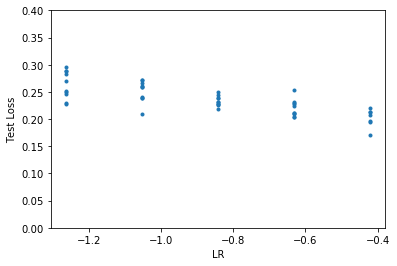

In [6]:
#plt.plot(baseline_LRs, baseline_data['init_LR_test_loss'], '.')
plt.plot(np.log10(model_LRs), model_data['meta_test_test_loss'], '.')#plt.plot(model_LRs, model_data['meta_test_test_loss'], '.')
plt.ylim([0, 0.4])
plt.xlabel('LR')
plt.ylabel('Test Loss')

In [7]:
np.log10(0.0001)
np.array(mon['model.eta'])<1).all()

SyntaxError: invalid syntax (<ipython-input-7-afdfb286c86f>, line 2)

In [8]:
for i, mon in enumerate(model_data['monitors']):
    if model_configs[i]['mlr'] == 0.001:
        plt.plot(mon['model.eta'], color='b', alpha=0.1)
plt.ylim([0, 0.2])

KeyError: 'model.eta'

In [9]:
figs_path = '/Users/omarschall/career-stuff/grants/fellowships_2019/google_faculty/figs/'

In [10]:
raw_data = np.array(baseline_data['init_LR_test_loss'])
unique_LRs = np.unique(np.array(baseline_LRs))
baseline_test_losses = {lr:[] for lr in unique_LRs}
for i, loss in enumerate(raw_data):
    baseline_test_losses[baseline_LRs[i]].append(loss)

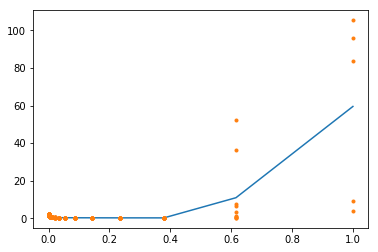

In [11]:
plt.plot(list(baseline_test_losses.keys()), [np.mean(v) for v in baseline_test_losses.values()])
plt.plot(baseline_LRs, raw_data, '.')

In [154]:
len(loss_means)

20

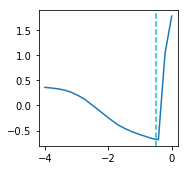

In [12]:
### --- GENERATE FIG 1 --- ###
raw_data = np.array(baseline_data['init_LR_test_loss'])
unique_LRs = np.unique(np.array(baseline_LRs))
baseline_test_losses = {lr:[] for lr in unique_LRs}
for i, loss in enumerate(raw_data):
    baseline_test_losses[baseline_LRs[i]].append(loss)
loss_means = np.array([np.mean(v) for v in baseline_test_losses.values()])
loss_sems = np.array([np.std(v)/np.sqrt(len(v)) for v in baseline_test_losses.values()])
fig = plt.figure(figsize=(2.5, 2.5))
#plt.plot(np.log10(baseline_LRs), np.log10(baseline_data['init_LR_test_loss']), '.', alpha=0.3)
#plt.plot(np.log10(unique_LRs), loss_means + loss_sems, color='C0')
#plt.plot(np.log10(unique_LRs), loss_means - loss_sems, color='C0')
plt.plot(np.log10(unique_LRs), np.log10(loss_means), color='C0')
lambda_star = -0.5
plt.axvline(x=lambda_star, color='C9', linestyle='--')
plt.xticks([-4, -2, 0])
#plt.ylim([0, 10])
fig.savefig(os.path.join(figs_path, 'LR_gridsearch.pdf'), dpi=300, format='pdf')

In [17]:
### --- GENERATE FIG 2 --- ###
fig = plt.figure(figsize=(2.5,2.5))
lambda_star = -0.5
for i, mon in enumerate(model_data['monitors']):
    layer_wise = np.array(model_data['monitors']['layer_wise_means'])
    for i in range(layer_wise.shape[1]):
        LR = np.array(mon['model.mean_eta'])
    if (LR < 0.05).any() or (LR > 1).any():
        continue
    LR = np.log10(LR)
    plt.plot([LR[0]], '.', color='C1', alpha=0.3)
    plt.plot(LR, color='C1', alpha=0.1)
plt.axhline(y=lambda_star, color='C9', linestyle='--')
#np.log10(np.arange(750)),
#plt.ylim([0, 1])
#fig.savefig(os.path.join(figs_path, 'LR_dynamics.pdf'), dpi=300, format='pdf')

TypeError: list indices must be integers or slices, not str

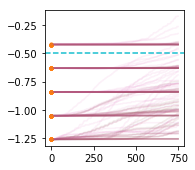

In [18]:
### --- GENERATE FIG 3 --- ###
fig = plt.figure(figsize=(2.5,2.5))
colors = ['C3', 'C4', 'C5', 'C6']
lambda_star = -0.5
for i, mon in enumerate(model_data['monitors']):
    layer_wise = np.array(mon['layer_wise_means'])
    for i in range(layer_wise.shape[1]):
        LR = layer_wise[:,i]
        if (LR < 0.05).any() or (LR > 1).any():
            continue
        LR = np.log10(LR)
        plt.plot([LR[0]], '.', color='C1', alpha=0.3)
        plt.plot(LR, color=colors[i], alpha=0.1)
plt.axhline(y=lambda_star, color='C9', linestyle='--')
#np.log10(np.arange(750)),
#plt.ylim([0, 1])
#fig.savefig(os.path.join(figs_path, 'LR_dynamics.pdf'), dpi=300, format='pdf')

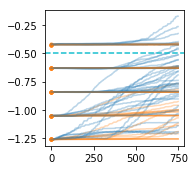

In [30]:
### --- GENERATE FIG 3 --- ###
fig = plt.figure(figsize=(2.5,2.5))
colors = ['C3', 'C4', 'C5', 'C6']
lambda_star = -0.5
i_layer = 0
for i, mon in enumerate(model_data['monitors']):
    layer_wise = np.array(mon['layer_wise_means'])
    LR = layer_wise[:,0]
    if (LR < 0.05).any() or (LR > 1).any():
        continue
    LR = np.log10(LR)
    plt.plot([LR[0]], '.', color='C1', alpha=0.3)
    plt.plot(LR, color='C1', alpha=0.3)
    LR = layer_wise[:,-1]
    if (LR < 0.05).any() or (LR > 1).any():
        continue
    LR = np.log10(LR)
    plt.plot([LR[0]], '.', color='C1', alpha=0.3)
    plt.plot(LR, color='C0', alpha=0.3)
plt.axhline(y=lambda_star, color='C9', linestyle='--')
#np.log10(np.arange(750)),
#plt.ylim([0, 1])
#fig.savefig(os.path.join(figs_path, 'LR_by_layer_dynamics.pdf'), dpi=300, format='pdf')

(0, 5000)

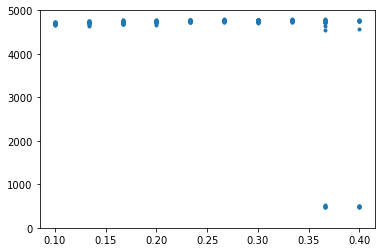

In [27]:
plt.plot(config_lrs, baseline_init_correct, '.')
plt.ylim([0, 5000])

ValueError: x and y must have same first dimension, but have shapes (75,) and (0,)

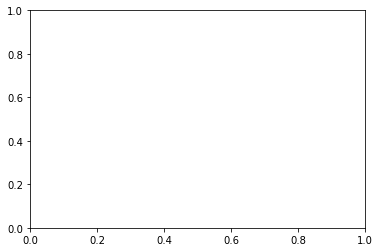

In [6]:
x_lim = 0
y_lim = 0.4
plt.plot(test_loss, baseline_mean_loss, '.')
plt.plot([x_lim, y_lim], [x_lim, y_lim], 'k')
plt.xlabel('Meta learning')
plt.ylabel('Baseline')
plt.axis('equal')
plt.xlim([x_lim, y_lim])
plt.ylim([x_lim, y_lim])

In [37]:
np.where(np.logical_and(np.array(baseline_mean_correct) < 4250,
                        np.array(test_correct) > 4500))

(array([24]),)

In [7]:
result = retrieve_job(23)
mean_LRs = result['mean_LRs']
std_LRs = result['std_LRs']
labels = result['labels']
plt.errorbar(range(len(mean_LRs)), mean_LRs, yerr=std_LRs)
plt.axhline(y=result['config']['lr'], color='C1')
param_types = ['W', 'b']
labels = ['Layer-{} {}'.format(i // 2, param_types[i % 2]) for i in range(len(mean_LRs))]
plt.xticks(range(len(mean_LRs)), labels)
plt.legend(['Init LR', 'Final LR'])
# plt.ylim([0,0.1])

TypeError: retrieve_job() missing 1 required positional argument: 'data_path'

In [10]:
test_correct

[4703,
 4752,
 4711,
 511,
 478,
 4743,
 4750,
 4720,
 4777,
 4760,
 4719,
 4713,
 4744,
 4748,
 4750,
 510,
 4757,
 4745,
 495,
 472,
 4757,
 4753,
 4781,
 4773,
 4746,
 4752,
 4764,
 4767,
 4751,
 4765,
 4721,
 4782,
 483,
 4740,
 502,
 493,
 4774,
 458,
 4790,
 4749,
 4614,
 4744,
 4761,
 4828,
 4778,
 502,
 477,
 497,
 4728,
 487,
 4737,
 478,
 4738,
 496,
 495,
 512,
 4748,
 482,
 4777,
 4787,
 496,
 488,
 4729,
 509,
 500,
 484,
 498,
 460,
 503,
 489,
 512,
 508,
 507,
 455,
 499]

In [103]:
private_LR_test_correct

[]